<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

In [2]:
nlp = spacy.load('en_core_web_lg')

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [3]:
#'https://www.indeed.com/jobs?q=Data+Science&l=Texas&start=10'
# scrape from the second page
import requests as r

In [4]:
from bs4 import BeautifulSoup
import html as html
import requests as r

def clean_string(string):
    #string = re.sub(r'<[^>]*>', ' ', string) # remove html tags
    string = BeautifulSoup(html.unescape(string)).text
    string = re.sub(r"\s+", " ", string)    
    string = re.sub(r'\n', '', string) # remove newline characters
    string = re.sub(r'[^a-zA-Z ^0-9]', '', string) # only alpha numeric characters
    string = string.lower()
    string = string.strip()
    return string

def tokenize(string):
    doc = nlp( clean_string(string) )
    def is_valid(token):
        return (token.is_punct==False and
                token.is_stop==False and token.text.strip() != '')
    result = [token.lemma_ for token in doc if is_valid(token)]
    return result

def flatten(l):
    return [item for sublist in l for item in sublist]

def get_summaries(n=150):
    summaries = []
    n += 10
    for i in range(0,n,20):
        resp = r.get(f'https://www.indeed.com/jobs?q=Data+Science&l=Texas&start={i}')
        soup = BeautifulSoup(resp.content, 'html.parser')
        page_summaries = soup.findAll("div", {"class": "summary"})
        page_summaries = [clean_string(str(summary)) for summary in page_summaries]
    
        summaries.append(page_summaries)
    return flatten(summaries)
summaries = get_summaries()
summaries[0:20]

['life sciences technology and services company with a configurable webbased data management platform used by leading pharmaceutical companies seeks a seasoned',
 'develop and maintain a formal description of the data and data structures data definitions and data models perform detailed data analysis ie determine the',
 'study and transform data science prototypes understanding of data structures data modeling and software architecture serve as a subject matter expert',
 'the candidate is expected to build extract transform load etl services and data connectors design data models and schemas for modern data warehouse',
 'ability to tell a story through data ensure data quality consistency and security facilitate delivery of ad hoc analysis and data requests',
 'collaborates with data scientists developers and teams to review data methodical and meticulous interested in data mining and data cleansing',
 'experience with common data science toolkits such as r weka numpy matlab etc depend

In [5]:
# df = pd.read_csv('data/job_listings.csv')

In [6]:
# temp for testing
# df = df.sample(100)

In [7]:
df = pd.DataFrame(summaries, columns=['description'])

In [8]:
df.head()

,description
0,life sciences technology and services company ...
1,develop and maintain a formal description of t...
2,study and transform data science prototypes un...
3,the candidate is expected to build extract tra...
4,ability to tell a story through data ensure da...


In [9]:
df.shape

(140, 1)

## 2) Use Spacy to tokenize / clean the listings 

In [10]:
df['clean_desc'] = df['description'].apply(clean_string)

In [11]:
df['tokens'] = df['description'].apply(tokenize)

In [12]:
#newline characters probably need to be taken care of
df['tokens'].head()

0    [life, sciences, technology, service, company,...
1    [develop, maintain, formal, description, datum...
2    [study, transform, datum, science, prototype, ...
3    [candidate, expect, build, extract, transform,...
4    [ability, tell, story, datum, ensure, data, qu...
Name: tokens, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()
def get_dtm(df, vect):
    return vect.fit_transform(df['clean_desc'])

In [14]:
dtm = get_dtm(df, vect)
pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

,10,11,35,5minute,ability,able,about,according,accuracy,across,...,workbachelors,workflow,working,workload,wrangling,write,years,you,youll,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


## 4) Visualize the most common word counts

In [15]:
from mynlp import create_wordcount_table
wc = create_wordcount_table(df['tokens'])
wc

,word,appears_in_count,count,rank,freq,cumfreq,appears_in_freq
2,datum,98,197,1.0,0.095910,0.095910,0.169844
56,data,61,77,2.0,0.037488,0.133398,0.105719
37,science,53,68,3.0,0.033106,0.166504,0.091854
84,experience,36,38,4.0,0.018500,0.185005,0.062392
4,company,21,29,5.0,0.014119,0.199124,0.036395
...,...,...,...,...,...,...,...
568,mldl,1,1,573.0,0.000487,0.998053,0.001733
569,modelling,1,1,574.0,0.000487,0.998539,0.001733
567,experiencesome,1,1,575.0,0.000487,0.999026,0.001733
570,summary,1,1,576.0,0.000487,0.999513,0.001733


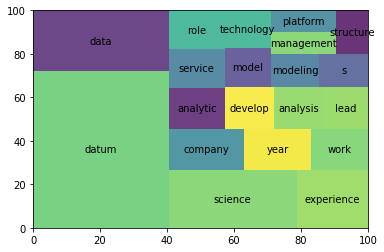

In [16]:
import squarify
top_20 = wc[wc['rank'] <= 20]
squarify.plot(sizes=top_20['freq'], label=top_20['word'], alpha=0.8)
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

### From wikipedia
In the fields of computational linguistics and probability, an n-gram is a contiguous sequence of n items from a given sample of text or speech. The items can be phonemes, syllables, letters, words or base pairs according to the application. The n-grams typically are collected from a text or speech corpus. When the items are words, n-grams may also be called shingles[clarification needed].[1]

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf
# 
tfidf = TfidfVectorizer(tokenizer=tokenize, min_df=0.025, max_df=.98, ngram_range=(1,2), stop_words='english')
vect = tfidf.fit(df['description'])
dtm = vect.transform(df['description'])

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

In [18]:
dtm.head()

,2,2 year,ability,ability tell,accord,ad,ad hoc,ai,analysis,analysis datum,...,visualization,warehouse,webbased,webbased datum,work,work experience,workbachelor,workbachelor degree,year,year experience
0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.192894,0.192894,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.149701,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.382298,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.194485,0.201197,0.0,0.208945,0.208945,0.0,0.151007,0.218109,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

### Cosine Similarity
'Brute Force' method but works well

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
dist_matrix = cosine_similarity(dtm)
dist_df = pd.DataFrame(dist_matrix)

In [20]:
# 
dist_df[15].sort_values(ascending=False)[:10]

15     1.000000
111    0.422250
47     0.390344
132    0.378874
126    0.372960
124    0.323490
64     0.312568
80     0.310713
11     0.301753
45     0.299286
Name: 15, dtype: float64

In [21]:
clean_string(df.description[15])

'the data scientist lead is an individual contributor that should be able to apply quantitative data science and analytical skills to complex problems'

In [22]:
clean_string(df.description[28])

'strong communication and data presentation skillsphd degree in computer science engineering or related technicalscientific field'

## Nearest Neighbor

In [23]:
dtm.head()

,2,2 year,ability,ability tell,accord,ad,ad hoc,ai,analysis,analysis datum,...,visualization,warehouse,webbased,webbased datum,work,work experience,workbachelor,workbachelor degree,year,year experience
0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.192894,0.192894,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.149701,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.382298,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.194485,0.201197,0.0,0.208945,0.208945,0.0,0.151007,0.218109,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [25]:
nn.kneighbors([dtm.iloc[31]])

(array([[0.        , 0.86572776, 1.10606556, 1.12329512, 1.175947  ]]),
 array([[ 31,  41,   8,  12, 123]]))

In [26]:
def get_similar(text_list):
    """dtm : document term matrix"""
    dtm = tfidf.transform(text_list)
    dtm = dtm.todense()
    return nn.kneighbors(dtm)

In [27]:
get_similar(['Easy high-paying salary job'])

(array([[1., 1., 1., 1., 1.]]), array([[15,  3,  5, 16,  2]]))

In [30]:
# maybe the descriptions aren't large enough. Worked better when I was using
# the complete job descriptions from the csv.
clean_string( df.iloc[16].description )

'bachelors degree or higher in applied statistics data science computer science or equivalent relevant experience research and development of new products'

In [31]:
get_similar(['billion years experience required'])

(array([[0.95699503, 1.02144294, 1.03493506, 1.08220138, 1.08220138]]),
 array([[ 98,  44, 115, 120,  18]]))

In [37]:
clean_string( df.iloc[98].description )

'data inventory classification and loss prevention 2 years experience with data loss prevention we are looking for technology business and process focused'

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 